# For one hand (google landmark draw)

,x,y,z,point_id,photo_id,is_right
0,304,527,0,0,1,1
1,244,465,-34,1,1,1
2,195,384,-53,2,1,1
3,151,323,-72,3,1,1
4,103,290,-91,4,1,1
5,278,282,-23,5,1,1
6,272,191,-44,6,1,1
7,272,136,-63,7,1,1
8,273,88,-80,8,1,1
9,334,283,-26,9,1,1


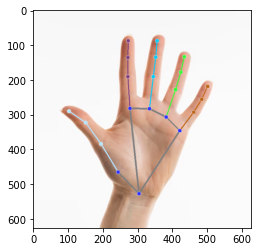

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green




# STEP 1: Load the input image.
image = mp.Image.create_from_file("images/image1.jpeg")
annotated_image = image.numpy_view()


resolution_x, resolution_y = image.width, image.height

# STEP 2: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd

# STEP 3: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

hand_landmarks_list = detection_result.hand_landmarks
handedness_list = detection_result.handedness


# STEP 5: Detect hand landmarks on the input image.
hand_info = {}
coordinates = []
for landmark in hand_landmarks_list[0]:
    coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(landmark.z * resolution_x)
    coordinates.append([coord_x, coord_y, coord_z])
    hand_info["coordinates"] = coordinates

hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
hand_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks_list[0]
])

# STEP 6: Draw the handedness info on the input image.
solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())
plt.imshow(annotated_image);

# STEP 7: Create a Pandas DataFrame with the coordinates of the hand landmarks.
for point in coordinates:
    hand1 = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
hand1 = hand1.rename(index={'x': 'hand1_x', 'y': 'hand1_y', 'z': 'hand1_z'})
hand1['point_id'] = range(0, len(hand1))
hand1['photo_id'] = '1'
if handedness_list[0][0].category_name == 'Right': hand1['is_right'] = 1
hand1.head(20)

# For more hands - working

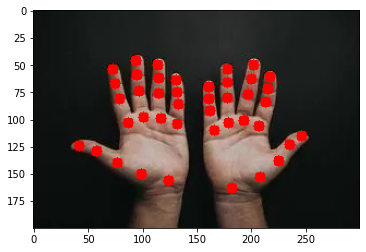

In [2]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import pandas as pd

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)  # vibrant green

# STEP 1: Load the input image.
image = mp.Image.create_from_file("images/image5.jpeg")
annotated_image = image.numpy_view()

resolution_x, resolution_y = image.width, image.height

# STEP 2: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 3: Create a HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='files/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

hand_info = {'coordinates': [], 'handedness': []}

for idx in range(len(detection_result.hand_landmarks)):
    hand_landmarks = detection_result.hand_landmarks[idx]
    handedness = detection_result.handedness[idx]

    coordinates = []
    for landmark in hand_landmarks:
        coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(
            landmark.z * resolution_x)
        coordinates.append([coord_x, coord_y, coord_z])

    hand_info['coordinates'].extend(coordinates)

    # Determine handedness and create a list of 20 True or False values accordingly.

    is_right = handedness[0].category_name == 'Right'
    handedness_list = [is_right] * 21

    hand_info['handedness'].extend(handedness_list)

    for point in hand_info['coordinates']:
        cv2.circle(annotated_image, (point[0], point[1]), 5, (255, 0, 0), -1)

# Now, you have a 'hand_info' dictionary with all coordinates and handedness information.

# Create a single Pandas DataFrame with all coordinates and handedness.
df = pd.DataFrame(hand_info['coordinates'], columns=['x', 'y', 'z'])
df['point_id'] = range(len(df))
df['photo_id'] = 1
df['is_right'] = hand_info['handedness']  # Assign the handedness information.
df['is_right'] = df['is_right'].astype(int)
plt.imshow(annotated_image);


In [58]:
df

,x,y,z,point_id,photo_id,is_right
0,182,163,0,0,1,0
1,208,153,-7,1,1,0
2,225,138,-7,2,1,0
3,235,123,-8,3,1,0
4,246,115,-8,4,1,0
5,207,106,0,5,1,0
6,213,84,-2,6,1,0
7,215,72,-7,7,1,0
8,217,61,-11,8,1,0
9,193,101,0,9,1,0


## generate one image for every point

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import pandas as pd
import os

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)  # vibrant green

# STEP 1: Load the input image.
image = mp.Image.create_from_file("images/image1.jpeg")
annotated_image = image.numpy_view()

resolution_x, resolution_y = image.width, image.height

# STEP 2: Import the necessary modules.
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 3: Create a HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='files/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

hand_info = {'coordinates': [], 'handedness': []}

for idx in range(len(detection_result.hand_landmarks)):
    hand_landmarks = detection_result.hand_landmarks[idx]
    handedness = detection_result.handedness[idx]

    coordinates = []
    for landmark in hand_landmarks:
        coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(
            landmark.z * resolution_x)
        coordinates.append([coord_x, coord_y, coord_z])

    hand_info['coordinates'].extend(coordinates)

    # Determine handedness and create a list of 20 True or False values accordingly.
    is_right = handedness[0].category_name == 'Right'
    handedness_list = [is_right] * 21
    hand_info['handedness'].extend(handedness_list)

# Create the directory to save the images if it doesn't exist
os.makedirs("images/image1", exist_ok=True)

# Save annotated images with points as RGB
for i, point in enumerate(hand_info['coordinates']):
    # Create a copy of the original image for each iteration
    annotated_image_copy = annotated_image.copy()
    
    # Draw the point on the copy
    cv2.circle(annotated_image_copy, (point[0], point[1]), 5, (0, 0, 255), -1)  # Red in RGB
    
    # Convert BGR to RGB
    annotated_image_rgb = cv2.cvtColor(annotated_image_copy, cv2.COLOR_BGR2RGB)
    
    # Save the image with the drawn point
    cv2.imwrite(f'images/image1/point{i}.jpeg', annotated_image_rgb)

# Create a single Pandas DataFrame with all coordinates and handedness.
df = pd.DataFrame(hand_info['coordinates'], columns=['x', 'y', 'z'])
df['point_id'] = range(len(df))
df['photo_id'] = 1
# Convert the list of booleans to integers (0 or 1)
df['is_right'] = [int(is_right) for is_right in hand_info['handedness']]



# Get hand_info and draw_hand function 

In [26]:
# STEP 1: Import the necessary modules.

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import pandas as pd
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

def get_hand_info(image_path, photo_id=0):
    # STEP 2: Load the input image.
    image = mp.Image.create_from_file(image_path)

    resolution_x, resolution_y = image.width, image.height

    

    # STEP 3: Create a HandLandmarker object.
    base_options = python.BaseOptions(model_asset_path='files/hand_landmarker.task')
    options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    # STEP 4: Detect hand landmarks from the input image.
    detection_result = detector.detect(image)

    hand_info = {'coordinates': [], 'handedness': []}

    for idx in range(len(detection_result.hand_landmarks)):
        hand_landmarks = detection_result.hand_landmarks[idx]
        handedness = detection_result.handedness[idx]

        coordinates = []
        for landmark in hand_landmarks:
            coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(
                landmark.z * resolution_x)
            coordinates.append([coord_x, coord_y, coord_z])

        hand_info['coordinates'].extend(coordinates)

        # Determine handedness and create a list of 20 True or False values accordingly.

        is_right = handedness[0].category_name == 'Right'
        handedness_list = [is_right] * 21

        hand_info['handedness'].extend(handedness_list)

        

    # Now, you have a 'hand_info' dictionary with all coordinates and handedness information.

    # Create a single Pandas DataFrame with all coordinates and handedness.
    df = pd.DataFrame(hand_info['coordinates'], columns=['x', 'y', 'z'])
    df['point_id'] = range(len(df))
    df['photo_id'] = photo_id
    df['is_right'] = hand_info['handedness']  # Assign the handedness information.
    df['is_right'] = df['is_right'].astype(int)
    
    return df, hand_info



# Draw point in image function
def draw_hand(hand_info, image_path, psize=5, color=(255, 0, 0)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for point in hand_info['coordinates']:
        cv2.circle(image, (point[0], point[1]), psize, color, -1)
    
    return image


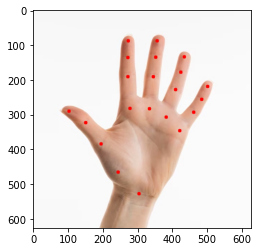

In [20]:
image_path = "images/image1.jpeg"

df, hand_info = get_hand_info(image_path)
image = draw_hand(hand_info, image_path)

plt.imshow(image);

# Multiple hands multiple images

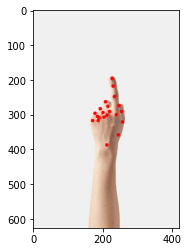

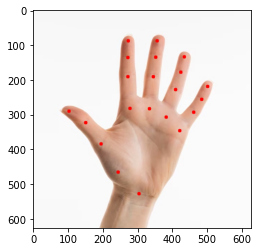

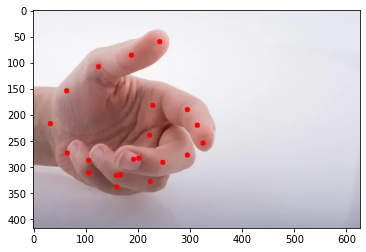

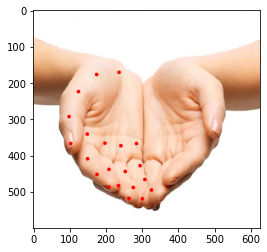

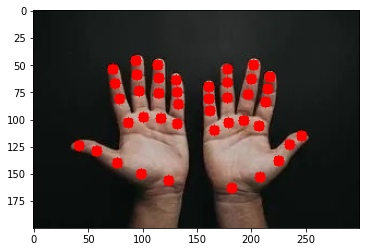

In [45]:
import os

image_folder = "files/images"
dfs = []

i = 0
for image in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image)
    df, hand_info = get_hand_info(image_path, i)
    image = draw_hand(hand_info, image_path)
    plt.imshow(image)
    plt.show()
    dfs.append(df)

    i += 1

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save the DataFrame as a CSV file
combined_df.to_csv('files/hand_landmarks.csv', index=False)



In [46]:
dfs

[      x    y   z  point_id  photo_id  is_right
 0   211  387   0         0         0         1
 1   244  358   3         1         0         1
 2   256  321   3         2         0         1
 3   253  291   4         3         0         1
 4   246  274   5         4         0         1
 5   238  300 -16         5         0         1
 6   233  248 -22         6         0         1
 7   229  218 -24         7         0         1
 8   226  196 -26         8         0         1
 9   211  301 -18         9         0         1
 10  207  263 -18        10         0         1
 11  214  276 -11        11         0         1
 12  219  291  -8        12         0         1
 13  189  309 -19        13         0         1
 14  192  283 -16        14         0         1
 15  200  294  -6        15         0         1
 16  203  307  -2        16         0         1
 17  170  317 -20        17         0         1
 18  177  296 -18        18         0         1
 19  184  305 -11        19         0   